In [2]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------ 572.0/572.0 kB 466.6 kB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv("USA_Daily_PC_Sorted.csv")
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index).astype('datetime64[ns]')

#df = pd.read_csv("USA_Daily_PC_Sorted.csv",index_col = 'Datetime', parse_dates=True)

In [5]:
df.head()

,AEP_MW
Datetime,
2004-10-01,14284.521739
2004-10-02,12999.875000
2004-10-03,12227.083333
2004-10-04,14309.041667
2004-10-05,14439.708333


In [6]:
df.shape

(5055, 1)

<AxesSubplot:title={'center':'Daily Energy Consumption in USA'}, xlabel='Datetime'>

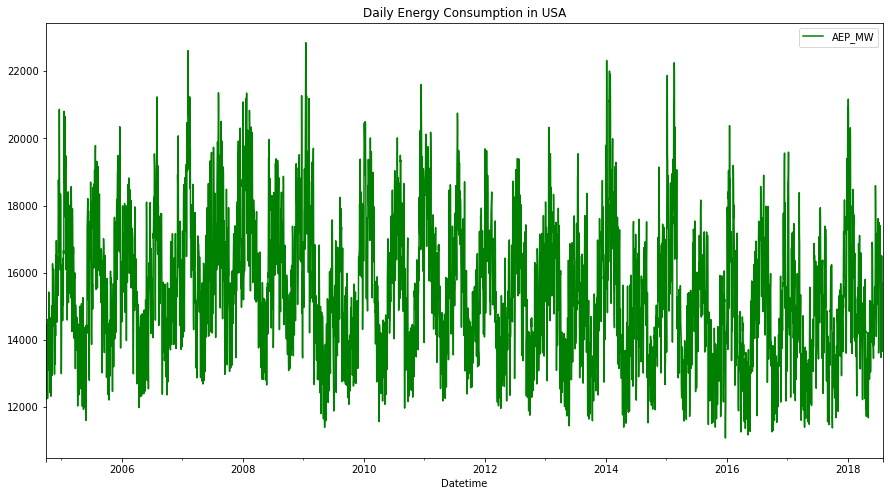

In [7]:
df.plot(figsize=(15,8),title="Daily Energy Consumption in USA", color="green")

In [8]:
#here 'AIC' means the default value
#if p-value is less than 0.05, the dataset is stationary which you can clearly observe
dftest = adfuller(df['AEP_MW'],autolag="AIC")
print("ADF : ",dftest[0])
print("P-Value : ",dftest[1])
print("Num of Lags : ",dftest[2])
print("Num of Observations Used for ADF Regression and Critical Values Calcultaions : ",dftest[3])
print("Critical Values : ",dftest[4])

ADF :  -7.4875156703390555
P-Value :  4.5971832394769364e-11
Num of Lags :  30
Num of Observations Used for ADF Regression and Critical Values Calcultaions :  5024
Critical Values :  {'1%': -3.4316522779278373, '5%': -2.8621154666284063, '10%': -2.5670763214801435}


In [9]:
from pmdarima import auto_arima

In [10]:
stepwise_fit = auto_arima(df["AEP_MW"],trace=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=83556.269, Time=8.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=84956.207, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=84849.861, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=84659.874, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=84954.207, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=83584.498, Time=1.94 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=83691.294, Time=2.97 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=83529.579, Time=6.90 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=83624.594, Time=10.40 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=83531.568, Time=13.74 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=83530.831, Time=8.75 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=83543.312, Time=14.61 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=83396.458, Time=3.92 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=83736.368, Time=1.95 sec
 ARIMA(5,1,1)(0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5055
Model:               SARIMAX(5, 1, 1)   Log Likelihood              -41521.955
Date:                Tue, 27 Dec 2022   AIC                          83057.911
Time:                        18:25:00   BIC                          83103.606
Sample:                    10-01-2004   HQIC                         83073.918
                         - 08-03-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1217      0.038      3.244      0.001       0.048       0.195
ar.L2         -0.4655      0.013    -34.852      0.000      -0.492      -0.439
ar.L3         -0.1469      0.021     -6.866      0.000      -0.189      -0.105
ar.L4         -0.1963      0.013    -15.472      0.000      -0.221      -0.171
ar.L5         -0.3405      0.015    -22.622      0.000      -0.370      -0.311
ma.L1         -0.0546      0.038     -1.420      0.156      -0.130       0.021
sigma2      7.982e+05    1.4e+04     56.981      0.000    7.71e+05    8.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               159.20
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.28
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
train = df.iloc[:-14]
test = df.iloc[-14:]
print(test.shape)

(14, 1)


In [41]:
model = ARIMA(train["AEP_MW"],order=(7,1,3))
model = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed t

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 AEP_MW   No. Observations:                 5041
Model:                 ARIMA(7, 1, 3)   Log Likelihood              -40886.161
Date:                Tue, 27 Dec 2022   AIC                          81794.322
Time:                        18:37:48   BIC                          81866.099
Sample:                    10-01-2004   HQIC                         81819.469
                         - 07-20-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6810      0.014     47.602      0.000       0.653       0.709
ar.L2         -0.7821      0.017    -45.101      0.000      -0.816      -0.748
ar.L3          0.8529      0.021     40.601      0.000       0.812       0.894
ar.L4         -0.3276      0.023    -13.977      0.000      -0.374      -0.282
ar.L5          0.1281      0.021      6.087      0.000       0.087       0.169
ar.L6          0.1359      0.018      7.708      0.000       0.101       0.170
ar.L7          0.2569      0.014     17.987      0.000       0.229       0.285
ma.L1         -0.5584      0.007    -75.878      0.000      -0.573      -0.544
ma.L2          0.5023      0.008     61.712      0.000       0.486       0.518
ma.L3         -0.9410      0.007   -143.638      0.000      -0.954      -0.928
sigma2       6.91e+05   1.19e+04     57.868      0.000    6.68e+05    7.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               336.73
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.18
Prob(H) (two-sided):                  0.82   Kurtosis:                         4.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
pred = model.predict(start=len(train),end=len(df)-1)
print(pred)

2018-07-21    14853.361755
2018-07-22    15279.270059
2018-07-23    16330.629981
2018-07-24    16270.947607
2018-07-25    15482.498916
2018-07-26    15631.767233
2018-07-27    15801.062436
2018-07-28    15216.133243
2018-07-29    15315.549987
2018-07-30    16097.264420
2018-07-31    15894.223564
2018-08-01    15260.327978
2018-08-02    15608.000341
2018-08-03    15888.101638
Freq: D, Name: predicted_mean, dtype: float64


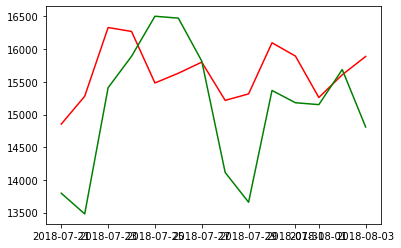

In [44]:
plt.plot(pred,color='red')
plt.plot(test,color='green')